# UBC Scientific Software Seminar
## October 21, 2016

Today's agenda: 
* Dimensionality reduction
    * Principal Component Analysis
    * Linear algebra
    * Lots of examples
* Hack on some open data

## Import packages as necessary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os.path

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits();

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.keys()

dict_keys(['target_names', 'images', 'target', 'DESCR', 'data'])

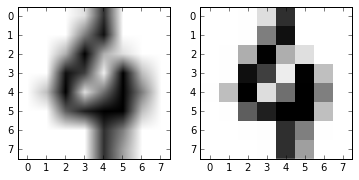

In [17]:
fig, ax = plt.subplots(1,2);
ax[0].imshow(digits.images[100,:,:], cmap ='binary');
ax[1].imshow(digits.images[100,:,:], cmap ='binary', interpolation='None');

## Doing PCA in Python

In [18]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2);

In [21]:
pca.fit(digits.data)

PCA(copy=True, n_components=2, whiten=False)

Project onto the two principal components that we generated

In [22]:
digits_2D = pca.transform(digits.data)

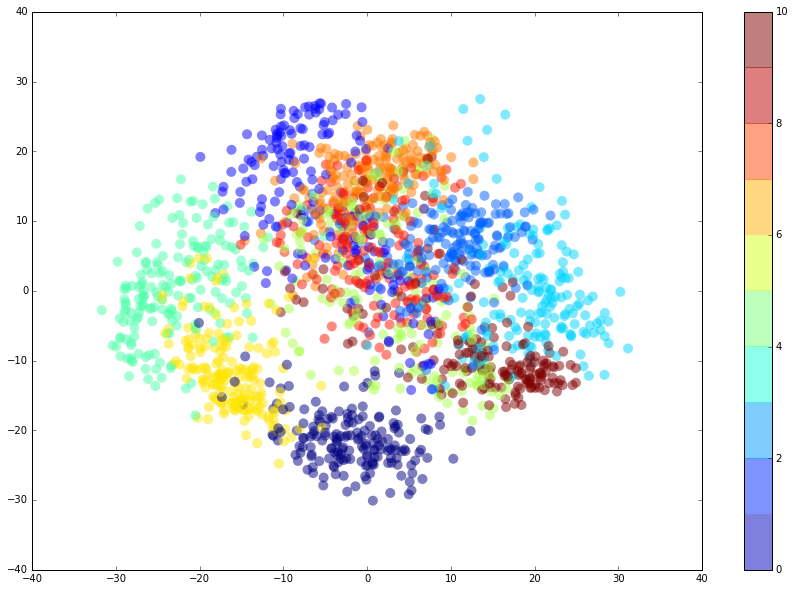

In [40]:
plt.figure(figsize=(15,10));
plt.scatter(digits_2D[:,0], digits_2D[:,1], c=digits.target, s=100, alpha=.5, lw=0);
plt.colorbar(boundaries=range(11));

### When is 5 equal to 8? 

In [41]:
fives = digits.data[digits.target==5];
eights = digits.data[digits.target==8];

In [42]:
pca2 = PCA(n_components=2);
fives_eights = np.vstack((fives, eights));
fives_eights_2 = pca2.fit_transform(fives_eights);

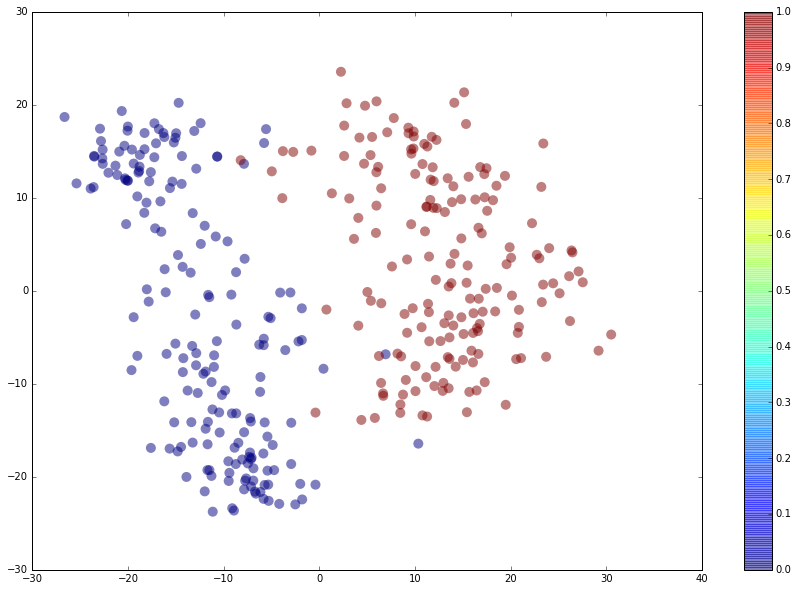

In [56]:
plt.figure(figsize=(15,10));
fives_eights_labels = [0 for _ in fives]+[1 for _ in eights];
plt.scatter(fives_eights_2[:,0], fives_eights_2[:,1], c=fives_eights_labels, s=100, alpha=.5, lw=0);
plt.colorbar();

### Do the PCA computation ourselves

In [58]:
X = np.matrix(digits.data)
A = X.T * X;

In [77]:
evals, evecs = np.linalg.eig(A);
print(evals[0])
print(evecs[:5,:2])

4809772.42559
[[ 0.          0.        ]
 [-0.00577193  0.01736194]
 [-0.10069602  0.2242008 ]
 [-0.22964187  0.13746467]
 [-0.22962908  0.03446864]]


In [85]:
v = pca.components_[0,:];
print(pca.components_[0,:5])

[  1.77484909e-19   1.73094651e-02   2.23428835e-01   1.35913304e-01
   3.30323092e-02]


Hey what do you know: the second eigenvector matches the first principal component. Isn't that weird...

But we should have normalized $X$ before computing $A$. So let's normalize and try again. 

In [89]:
X2 = np.matrix(digits.data) - np.mean(digits.data, axis=0);
A2 = X2.T * X2;
evals2, evecs2 = np.linalg.eig(A2);
evecs2[:5,0]

matrix([[ 0.        ],
        [ 0.01730947],
        [ 0.22342883],
        [ 0.1359133 ],
        [ 0.03303231]])

For PCA we want to find: $\arg\max_{\|w\|=1} \|(X-\mu_1)w\|^2$ where $\mu_1$ is the column-axis mean of $X$ producing a row vector